In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [47]:
MIN, MAX, N = 0, 0.2, 201
h = (MAX - MIN) / (N - 1)
OMEGA = 0.5
TOLERANCE = 1e-3
N_ITERATIONS = int(1e3)

def temperatura(N, h):
    T = np.zeros((N, N))
    T[0, :] = 10.0
    T[-1, :] = 0.0
    T[:, 0] = 0.0
    T[:, -1] = 0.0
    return T

In [48]:
def relaxation(T, h, omega=OMEGA, tolerance=TOLERANCE, n_iterations=N_ITERATIONS):
    for iteration in range(n_iterations):
        T_old = T.copy()
        T[1:-1, 1:-1] = 0.25 * (T_old[2:, 1:-1] + T_old[:-2, 1:-1] + T_old[1:-1, 2:] + T_old[1:-1, :-2])
        delta = np.max(np.abs(T - T_old))
        if delta < tolerance:
            break
    return T, iteration

In [49]:
def plot(T, x_range, y_range):
    X, Y = np.meshgrid(x_range, y_range)
    fig = plt.figure(figsize=(15, 7))
    ax1 = fig.add_subplot(121)
    contour = ax1.contourf(X, Y, T.T, cmap='viridis')
    plt.colorbar(contour, ax=ax1)
    ax1.set_title('2D Contorno Plot de Temperatura')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(X, Y, T.T, cmap='viridis')
    ax2.set_title('3D Superficie Plot de Temperatura')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Temperatura')
    plt.show()


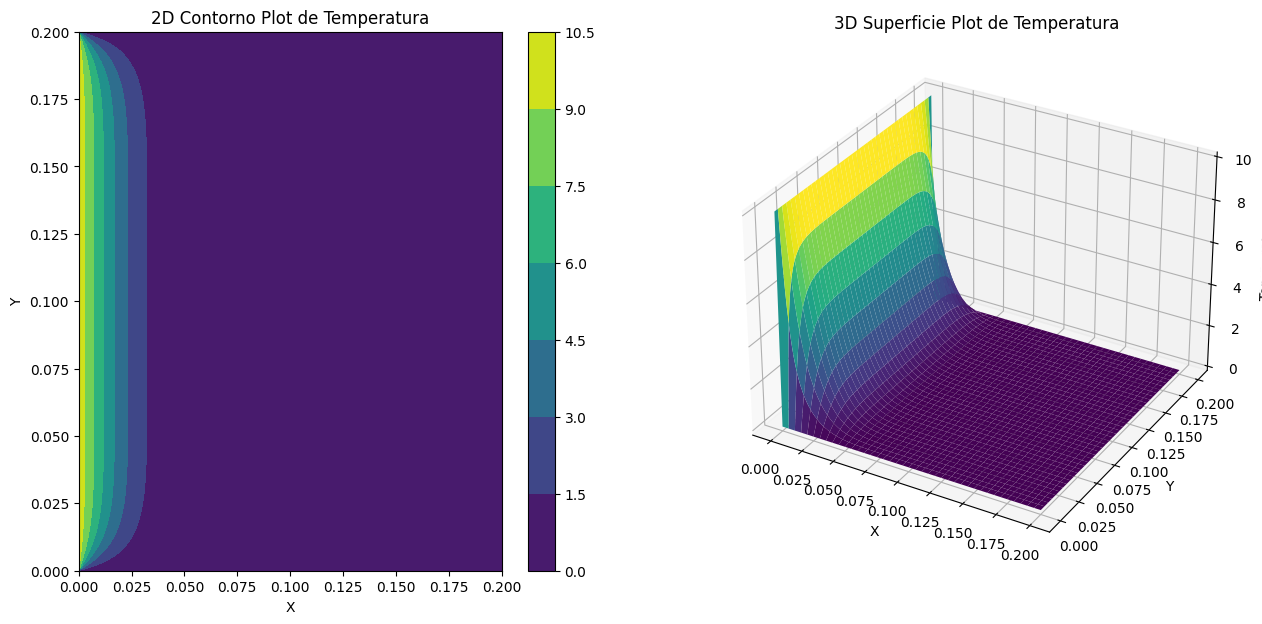

In [50]:
T_inicial = temperatura(N, h)
T_final, iterations = relaxation(T_inicial, h)
x_range = np.linspace(MIN, MAX, N)
y_range = np.linspace(MIN, MAX, N)
plot(T_final, x_range, y_range)